In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from TrialSolution import TrialSolution

## Example 1

$\frac{d}{dx}\Psi+(x+\frac{1+3x^2}{1+x+x^3})\Psi=x^3+2x+x^2\frac{1+3x^2}{1+x+x^3}$

With boundary initial condition $\Psi(0)=1$ and domain $x\in[0,1]$

In [2]:
X_train = np.arange(0, 1.1, 0.1) + 1e-8
X_train = X_train.reshape(-1,1)
X_test = np.arange(0, 1.1, 0.01) + 1e-8
X_test = X_test.reshape(-1,1) 

In [3]:
inits = [{'variable':0, 'value':0, 'type':'dirichlet',
        'function':lambda X: tf.constant(1., dtype='float64', shape=(X.shape[0],1))}]

The trial solution for this case is $\Psi(x)=1 + x N(x)$.
The first function below is the function $A(x)=1$
and the second function is the function $B(x)=x$.
Though, in our case, the trial solution is generated automatically from the initial conditions.

### Defining the trial solution with an apropiate network

In [7]:
ts = TrialSolution(inits, n_i=1, n_h=10, n_o=1, equation_type='ODE')

### Defining the loss function for a single point and a whole set

The loss function is based on the formula:
$$Loss(N)=\sum_i \left(L\Psi(x_i, N(x_i))-f(x_i,\Psi(x_i, N(x_i))) \right)^2$$
Where $N(x)$ is the neural network and $L$ is some differential operator.

In [8]:
def diff_loss(network, inputs):
  # Compute the gradients
  with tf.GradientTape() as tape:
    inputs = tf.convert_to_tensor(inputs)
    tape.watch(inputs)
    response = network(inputs)
  grads = tape.gradient(response, inputs)
  X = inputs
  
  # Compute the loss
  loss = tf.square(grads + tf.multiply(X + (1 + 3*X**2)/(1+X+X**3), response)
          - X**3 -2*X tardines - X**2*(1 + 3*X**2)/(1+X+X**3))
  return loss

### Training

In [9]:
ts.train(X=X_train, diff_loss=diff_loss, epochs=10000, message_frequency=1000, optimizer_name='SGD', learning_rate=0.1)

W1017 23:17:44.953837  1348 ag_logging.py:145] Entity <function <lambda> at 0x000001C6CBE8D9D8> could not be transformed and will be executed as-is. Please report this to the AutoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: converting <function <lambda> at 0x000001C6CBE8D9D8>: ValueError: Failed to parse source code of <function <lambda> at 0x000001C6CBE8D9D8>, which Python reported as:
'function':lambda X: tf.constant(1., dtype='float64', shape=(X.shape[0],1))
If this is a lambda function, the error may be avoided by creating the lambda in a standalone statement. Tried to strip down the source to:
'function':lambda X: tf.constant(1., dtype='float64', shape=(X.shape[0],1))
But that did not work.


'function':lambda X: tf.constant(1., dtype='float64', shape=(X.shape[0],1))
If this is a lambda function, the error may be avoided by creating the lambda in a standalone statement. Tried to strip down the source to:
'function':lambda X: tf.constant(1., dtype='float64', shape=(X.shape[0],1))
But that did not work.


W1017 23:17:45.687498  1348 ag_logging.py:145] Entity <function <lambda> at 0x000001C6CBE8D9D8> could not be transformed and will be executed as-is. Please report this to the AutoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: converting <function <lambda> at 0x000001C6CBE8D9D8>: ValueError: Failed to parse source code of <function <lambda> at 0x000001C6CBE8D9D8>, which Python reported as:
'function':lambda X: tf.constant(1., dtype='float64', shape=(X.shape[0],1))
If this is a lambda function, the error may be avoided by creating the lambda in a standalone statement. Tried to strip down the source to:
'function':lambda X: tf.constant(1., dtype='float64', shape=(X.shape[0],1))
But that did not work.


'function':lambda X: tf.constant(1., dtype='float64', shape=(X.shape[0],1))
If this is a lambda function, the error may be avoided by creating the lambda in a standalone statement. Tried to strip down the source to:
'function':lambda X: tf.constant(1., dtype='float64', shape=(X.shape[0],1))
But that did not work.
Epoch: 1000 Loss: 0.07389729470014572
Epoch: 2000 Loss: 0.03808184340596199
Epoch: 3000 Loss: 0.025743363425135612
Epoch: 4000 Loss: 0.01953820139169693
Epoch: 5000 Loss: 0.015780627727508545
Epoch: 6000 Loss: 0.013297692872583866
Epoch: 7000 Loss: 0.022845983505249023
Epoch: 8000 Loss: 0.020325904712080956
Epoch: 9000 Loss: 0.01815217360854149
Epoch: 10000 Loss: 0.016396595165133476


### Plotting the results 

The numerical solution (training set - red, valdiaiton set - green) along with the analytical solution (blue).

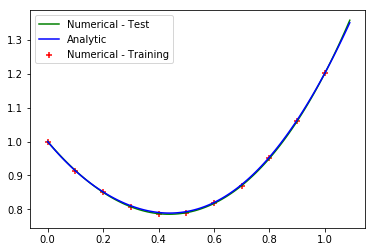

In [10]:
pred_train = ts.call(tf.convert_to_tensor(X_train, dtype='float64')).numpy()
pred_test = ts(tf.convert_to_tensor(X_test, dtype='float64')).numpy()
plt.scatter(X_train, pred_train, c='r', label='Numerical - Training', marker='+', s=30)
plt.plot(X_test, pred_test, c='g', label='Numerical - Test')
plt.plot(X_test, np.exp(-0.5*X_test**2)/(1+X_test+X_test**3) + X_test**2, c='b', label='Analytic')
plt.legend()
plt.show()

Let's check the errors on the training set.

In [ ]:
plt.plot(X_train, pred_train - np.exp(-0.5*X_train**2)/(1+X_train+X_train**3) - X_train**2, label='Error - Train')
plt.legend()
plt.show()

Let's check the errors on the test set.

In [ ]:
plt.plot(X_test, pred_test - np.exp(-0.5*X_test**2)/(1+X_test+X_test**3) - X_test**2, label='Error - Test')
plt.legend()
plt.show()

The mean loss calculated on the test set.

In [ ]:
diff_loss(ts, X_test).numpy().mean()

Mean absolute error on the train set.

In [ ]:
np.abs(pred_train - np.exp(-0.5*X_train**2)/(1+X_train+X_train**3) - X_train**2).mean()

Mean absolute error on the test set - interpolation error.

In [ ]:
np.abs(pred_test - np.exp(-0.5*X_test**2)/(1+X_test+X_test**3) - X_test**2).mean()